In [1]:
import os
import glob
import pandas as pd
import numpy as np

import sys
import pickle
import hdf5storage
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedFormatter, FixedLocator

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
df_sorted = pd.read_csv('../../../../raw_data/sheets/02-12-20-McGillData_WH_Exprodo-Report_IncExc_CR_CRmed_cham_CRtopfdemeduc_civetpass_slopes_ph5_11_time.age_sorted.csv')



In [2]:
#load in an lv, set behavs and components text once, will be same for all
lv_fname = 'lv_one.mat'
out_base = 'hbm_lv_one'
lv_ = hdf5storage.loadmat(lv_fname)
components_list = []
for idx in range(0,len(lv_['components'].tolist()[0])):
    components_list.append( str(lv_['components'].tolist()[0][idx][0]) )

    behavs_list = []
for idx in range(0,len(lv_['behavs_text'].tolist()[0])):
    behavs_list.append( str(lv_['behavs_text'].tolist()[0][idx][0]) )
    
    
mycolors = ['b','b','olivedrab','olivedrab','maroon','maroon','y','y',
           'darkviolet','darkviolet','c','c','g','g']

lv_one_err = np.concatenate( (lv_['lower'], lv_['upper']))

In [3]:
#Update the behavs list text, in accordance with terms used in text
behavs_list_updated = behavs_list.copy()
#fluency
behavs_list_updated[0] = "LexicalFlu_baseline"; behavs_list_updated[1] = "LexicalFlu_decline"
behavs_list_updated[2] = "SemanticFlu_baseline"; behavs_list_updated[3] = "SemanticFlu_decline"
#memory
behavs_list_updated[4] = "Memory_baseline"; behavs_list_updated[5] = "Memory_decline"
#ah4 reasoning
behavs_list_updated[6] = "InductiveReasoning_baseline"; behavs_list_updated[7] = "InductiveReasoning_decline"
behavs_list_updated[8] = "VerbalReasoning_baseline"; behavs_list_updated[9] = "VerbalReasoning_decline"
behavs_list_updated[10] = "MathematicalReasoning_baseline"; behavs_list_updated[11] = "MathematicalReasoning_decline"
behavs_list_updated[12] = "Vocabulary_baseline"; behavs_list_updated[13] = "Vocabulary_decline"
behavs_list_updated

['LexicalFlu_baseline',
 'LexicalFlu_decline',
 'SemanticFlu_baseline',
 'SemanticFlu_decline',
 'Memory_baseline',
 'Memory_decline',
 'InductiveReasoning_baseline',
 'InductiveReasoning_decline',
 'VerbalReasoning_baseline',
 'VerbalReasoning_decline',
 'MathematicalReasoning_baseline',
 'MathematicalReasoning_decline',
 'Vocabulary_baseline',
 'Vocabulary_decline']

In [4]:
y_pos = np.arange(len(lv_['lvcorrs'].tolist()[0][0:4]))
y_pos,lv_['lvcorrs'].tolist()[0][0:4]

(array([0, 1, 2, 3]),
 [-0.22417667508125305,
  0.17266766726970673,
  -0.24968083202838898,
  0.2532438039779663])

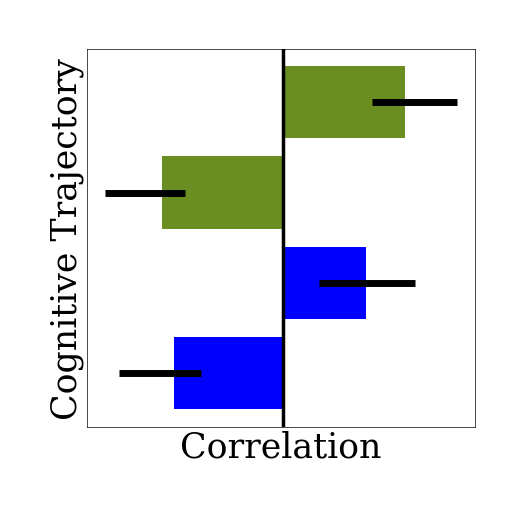

In [5]:
mpl.rcParams['axes.linewidth'] = 0.1
fig, ax = plt.subplots(1,1, figsize = (1,1),dpi = 500)
y_pos = np.arange(len(lv_['lvcorrs'].tolist()[0][0:4]))

p = ax.barh(y_pos,lv_['lvcorrs'].tolist()[0][0:4], align = 'center', color = mycolors[0:4],
           xerr = lv_one_err[:,0:4], error_kw = {'elinewidth':1})
ax.yaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax.yaxis.set_major_locator(FixedLocator(y_pos))
ax.tick_params(axis='both', labelsize=2)
ax.set_xlabel("Correlation",fontsize=2)
ax.set_xlabel('Correlation',fontsize=5, labelpad=0.5); ax.set_ylabel('Cognitive Trajectory',fontsize=5, labelpad=0.5)
ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 
plt.axvline(x=0,c='k', linewidth=0.5)
ax.set_facecolor('white')
plt.savefig("paper_lv_schematic.png",bbox_inches='tight', dpi = 'figure')

In [6]:
age=df_sorted['OX.AGE'].values
print(np.mean(age), np.std(age), np.min(age), np.max(age))
edu=df_sorted['OX.EDUC_ftht'].values
print(np.mean(edu), np.std(edu), np.min(edu), np.max(edu))
sex=df_sorted['OX.SEX'].values
print(np.shape(np.where(sex=='Female')))
scanner=df_sorted['prisma_bool'].values
print(np.shape(np.where(scanner==0)))

69.52021809045227 4.897962355736868 60.5585 82.7625
15.842349246231153 3.537355028708965 6.0 31.5
(1, 92)
(1, 281)


In [7]:
#load in an lv, set behavs and components text once, will be same for all
## each lv .mat file saves the usc and vsc, so no need to load each

fname = "lv_one.mat"
pls_res = hdf5storage.loadmat(fname)
components_list = []
for idx in range(0,len(pls_res['components'].tolist()[0])):
    components_list.append( str(pls_res['components'].tolist()[0][idx][0]) )

    behavs_list = []
for idx in range(0,len(pls_res['behavs_text'].tolist()[0])):
    behavs_list.append( str(pls_res['behavs_text'].tolist()[0][idx][0]) )

In [8]:
#Now start to look at LV data with demographic and cog info
#concatenate demographic/cog info with Behav scores
vsc_cols = []
for lv in range(1,15):
    vsc_cols.append("vsc_LV_" + str(lv))
df_vsc = pd.DataFrame(data=pls_res['vsc'],columns=vsc_cols)
df_vsc
usc_cols = []
for lv in range(1,15):
    usc_cols.append("usc_LV_" + str(lv))
df_usc = pd.DataFrame(data=pls_res['usc'],columns=usc_cols)
df_usc
df_demo_pls = pd.concat([df_sorted,df_vsc], sort=False,axis=1)
df_demo_pls = pd.concat([df_demo_pls,df_usc], sort=False,axis=1)
df_demo_pls

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,usc_LV_5,usc_LV_6,usc_LV_7,usc_LV_8,usc_LV_9,usc_LV_10,usc_LV_11,usc_LV_12,usc_LV_13,usc_LV_14
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-1.433141,1.349375,-1.592176,0.431176,-0.638657,0.603795,-0.274042,0.602765,-0.517333,0.154765
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,-2.570652,1.591861,0.295057,-5.209806,-2.438232,-3.006096,3.869395,-0.720095,3.019581,-0.930562
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,0.740175,2.609343,-1.710288,1.265848,-1.900591,-0.372568,0.076476,0.378466,1.538939,-0.732669
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.155537,2.315267,0.565242,-0.423613,-0.874421,-1.166017,1.392534,-0.383404,0.849230,-0.057131
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.591455,1.079388,1.399165,0.499474,-0.419923,1.006246,-0.518112,-0.539956,0.915932,0.936019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.747962,-0.326136,-1.078864,-1.180861,-0.718080,-0.180101,-3.754661,-2.052109,-1.223487,-2.489717
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,0.764816,-0.653548,-0.041174,1.527856,0.044859,-1.639421,2.143183,-0.263250,0.804646,-2.025195
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.741195,-1.054306,3.421493,-0.570429,0.035394,1.186552,-2.813330,1.225946,-0.390385,-2.002123
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-7.146390,-0.757503,3.411887,-4.061650,-1.562605,-1.757667,0.020424,-0.490507,-1.086373,3.175560


In [9]:
def make_lv_grouping(df):
    if df['vsc_LV_1'] >= 0:
        if df['vsc_LV_2'] >= 0:
            group = 'A'
        elif df['vsc_LV_2'] < 0:
            group = 'B'
    elif df['vsc_LV_1'] < 0:
        if df['vsc_LV_2'] >= 0:
            group = 'C'
        elif df['vsc_LV_2'] < 0:
            group = 'D'
    return group

In [10]:
df_demo_pls['LV_Group'] = df_demo_pls.apply(make_lv_grouping, axis=1)
groups = df_demo_pls.groupby('LV_Group')
df_demo_pls

,oxmg_id,bet_qc..0.5.fair..0.bad..blank..good.,Motion_qc,T1_comments_SS,General_comments,FinalVerdict_SSProject_Include.Exclude,SS_IncExc,motion_status_rai,final_status_SS_RP,OX.MRI,...,usc_LV_6,usc_LV_7,usc_LV_8,usc_LV_9,usc_LV_10,usc_LV_11,usc_LV_12,usc_LV_13,usc_LV_14,LV_Group
0,1191,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.349375,-1.592176,0.431176,-0.638657,0.603795,-0.274042,0.602765,-0.517333,0.154765,B
1,1181,NaN,NaN,NaN,NaN,NaN,Include,exclude,exclude,Yes,...,1.591861,0.295057,-5.209806,-2.438232,-3.006096,3.869395,-0.720095,3.019581,-0.930562,C
2,1066,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.609343,-1.710288,1.265848,-1.900591,-0.372568,0.076476,0.378466,1.538939,-0.732669,B
3,1407,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,2.315267,0.565242,-0.423613,-0.874421,-1.166017,1.392534,-0.383404,0.849230,-0.057131,D
4,1300,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,1.079388,1.399165,0.499474,-0.419923,1.006246,-0.518112,-0.539956,0.915932,0.936019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1124,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.326136,-1.078864,-1.180861,-0.718080,-0.180101,-3.754661,-2.052109,-1.223487,-2.489717,A
394,2888,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.653548,-0.041174,1.527856,0.044859,-1.639421,2.143183,-0.263250,0.804646,-2.025195,D
395,1502,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-1.054306,3.421493,-0.570429,0.035394,1.186552,-2.813330,1.225946,-0.390385,-2.002123,A
396,1224,NaN,NaN,NaN,NaN,NaN,Include,include,include,Yes,...,-0.757503,3.411887,-4.061650,-1.562605,-1.757667,0.020424,-0.490507,-1.086373,3.175560,C


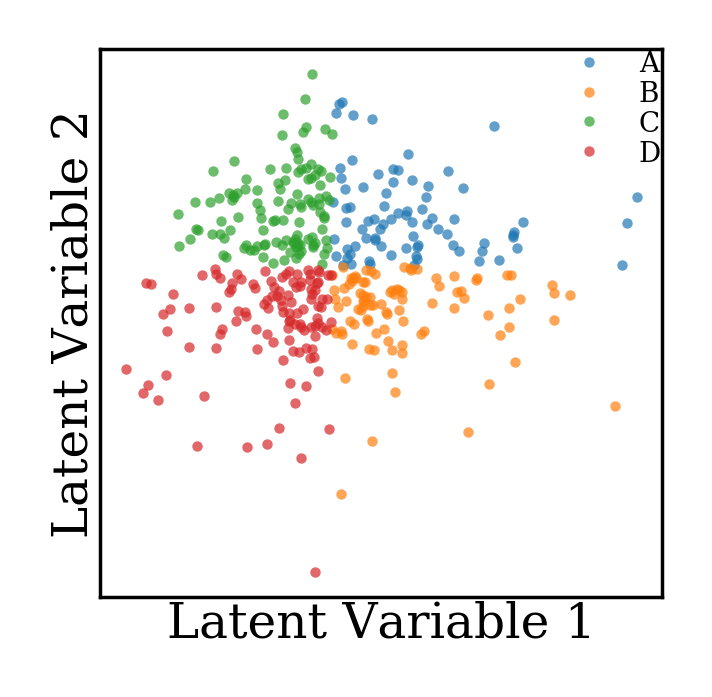

In [11]:
mpl.rcParams['axes.linewidth'] = 0.5
fig, ax = plt.subplots(1,1, figsize = (1.45,1.45), dpi=500)
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.vsc_LV_1, group.vsc_LV_2, marker='o', ms=0.5, linestyle='', label=name, alpha=0.7)
ax.set_xlabel('Latent Variable 1',fontsize=7, labelpad=0.5); ax.set_ylabel('Latent Variable 2',fontsize=7, labelpad=0.5)
ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False) 
ax.legend(fontsize=4,frameon=False, labelspacing=0.1, borderaxespad=0.05, borderpad=0.0, loc='upper right')
plt.savefig("lv1_vs_lv2_schematic.png",bbox_inches='tight', dpi = 'figure')
plt.show()


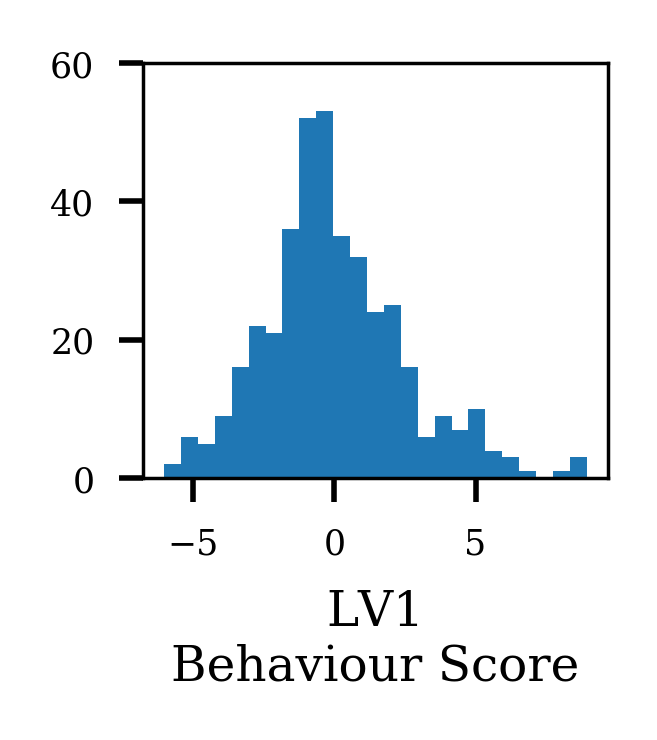

In [38]:
#### LV1 ####
fig, ax = plt.subplots(1,1, figsize = (1.2,1.1), dpi=500)
ax.hist(df_demo_pls['vsc_LV_1'].values.flatten(),bins=25)
ax.set_xlabel('LV1\nBehaviour Score', fontsize=7)
ax.tick_params(axis='both', labelsize=5)
#plt.title('Histogram of LV1 Behaviour Scores')
ax.xaxis.set_ticks(np.arange(-5, 5.01, 5))
ax.yaxis.set_ticks(np.arange(0, 61, 20))
plt.savefig("lv1_behavscore_hist.png",bbox_inches='tight', dpi = 'figure')


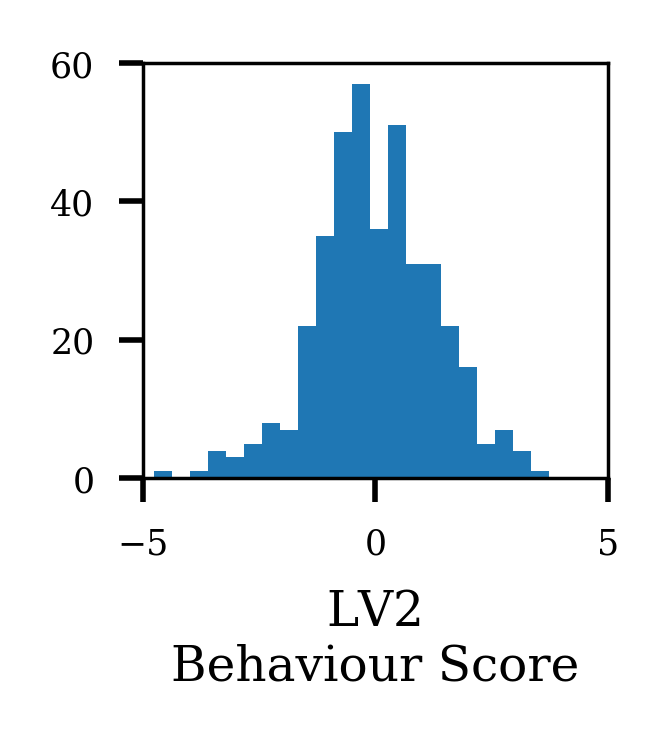

In [37]:
#### LV1 ####
fig, ax = plt.subplots(1,1, figsize = (1.2,1.1), dpi=500)
ax.hist(df_demo_pls['vsc_LV_2'].values.flatten(),bins=25)
ax.set_xlabel('LV2\nBehaviour Score', fontsize=7)
ax.tick_params(axis='both', labelsize=5)
ax.set_xlim((-5,5))
ax.xaxis.set_ticks(np.arange(-5, 5.01, 5))
ax.yaxis.set_ticks(np.arange(0, 61, 20))
plt.savefig("lv2_behavscore_hist.png",bbox_inches='tight', dpi = 'figure')

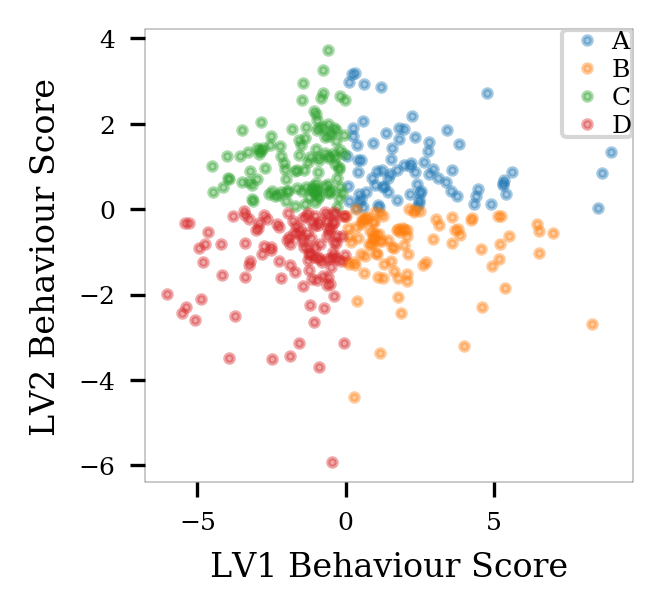

In [25]:
fig, ax = plt.subplots(1,1, figsize = (2.1,2), dpi=300)
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.vsc_LV_1, group.vsc_LV_2, marker='o', ms=2, linestyle='', label=name, alpha=0.4)
ax.set_xlabel('LV1 Behaviour Score',fontsize=8); ax.set_ylabel('LV2 Behaviour Score',fontsize=8)
ax.tick_params(axis='both', labelsize=6)
ax.legend(fontsize=6,frameon=True, labelspacing=0.2, borderaxespad=0.05,borderpad=0,handletextpad=0)
#plt.savefig("lv1_vs_lv2_groups.png",bbox_inches='tight', dpi = 'figure')
plt.show()